# OAT15A lift and drag coefficients

In [1]:
from glob import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import torch as pt
from scipy.signal import welch
from utils import fetch_force_coefficients, interpolate_uniform_1D

mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

run = "/media/andre/Elements/naca0012_shock_buffet/run/"
# run = "../run/"
output = "./output/"
!mkdir -p output

print("Matplolib version: ", mpl.__version__)
print("Numpy version: ", np.__version__)

Matplolib version:  3.3.3
Numpy version:  1.19.2


In [2]:
Ma = 0.73
U_inf = 250.755
a_inf = U_inf / Ma
chord = 0.18354968

## Pre-onset condition

In [3]:
cases = ("oat15_25_saiddes_ref{:1d}".format(ref) for ref in (0, 1))

Found 3 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/oat15_25_saiddes_ref0/postProcessing/forces/
Found 7 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/oat15_25_saiddes_ref1/postProcessing/forces/


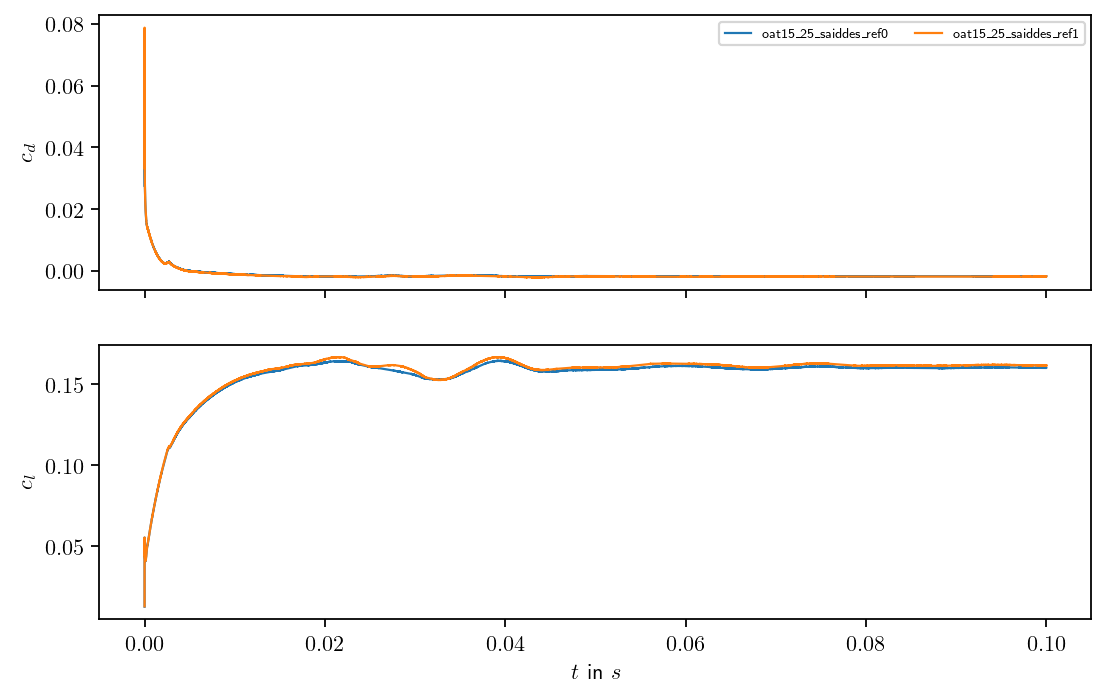

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

lw = 1.0
every = 5

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    ax1.plot(t[::every], cd[::every], c="C{:d}".format(i), lw=lw, label=r"{:s}".format(case.replace("_", "\_")))
    ax2.plot(t[::every], cl[::every], c="C{:d}".format(i), lw=lw)
ax1.legend(fontsize=6, ncol=3, loc=1)
ax1.set_ylabel(r"$c_d$")
ax2.set_ylabel(r"$c_l$")
ax2.set_xlabel(r"$t$ in $s$")
#ax1.set_ylim(0.0, 0.05)
#ax2.set_ylim(0.05, 0.225)
plt.show()

## Buffet condition

In [3]:
#cases = ["oat15_35_saiddes_ref{:1d}".format(ref) for ref in (0, 1)]
cases = []
cases += ["oat15_35_saiddes_ref{:1d}_z32".format(ref) for ref in (0, 1)]

Found 18 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/oat15_35_saiddes_ref0_z32/postProcessing/forces/
Found 16 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/oat15_35_saiddes_ref1_z32/postProcessing/forces/


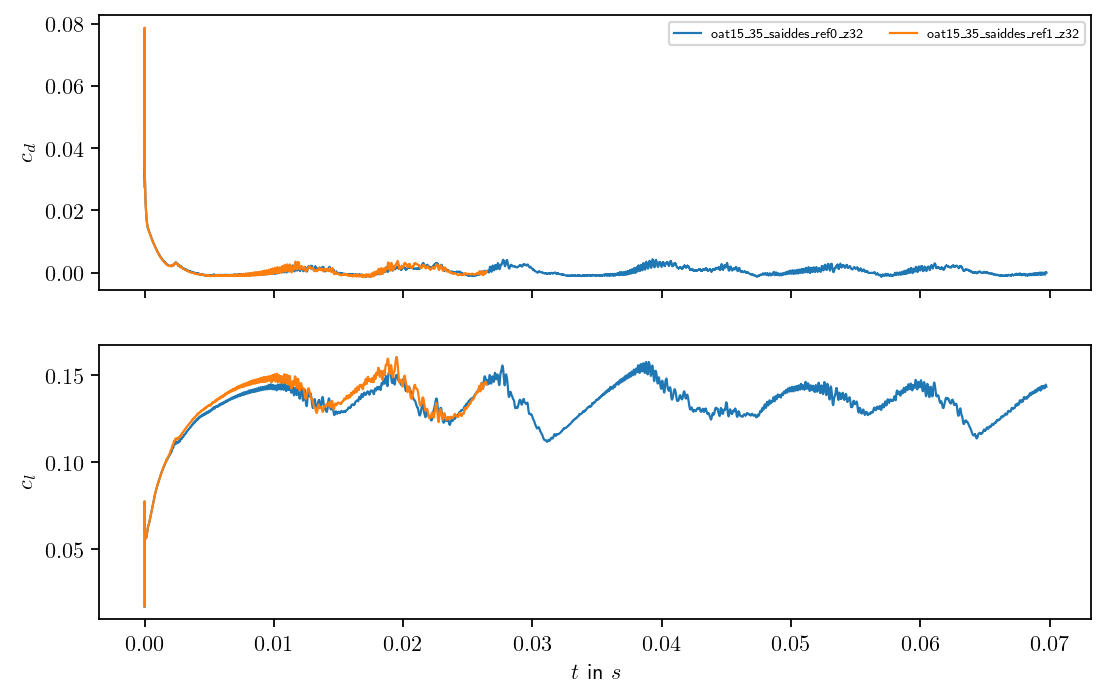

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

lw = 1.0
every = 10

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    # forgot again to adjust reference area
    fac = 0.02/0.26 if "z32" in case else 1.0
    ax1.plot(t[::every], fac*cd[::every], c="C{:d}".format(i), lw=lw, label=r"{:s}".format(case.replace("_", "\_")))
    ax2.plot(t[::every], fac*cl[::every], c="C{:d}".format(i), lw=lw)
ax1.legend(fontsize=6, ncol=3, loc=1)
ax1.set_ylabel(r"$c_d$")
ax2.set_ylabel(r"$c_l$")
ax2.set_xlabel(r"$t$ in $s$")
#ax1.set_ylim(-0.005, 0.005)
#ax2.set_ylim(0.1, 0.2)
plt.savefig(output + "oat15_a35_lift_and_drag.pdf", bbox_inches="tight")